# 2HDM-I

In [1]:
from sympy import symbols, init_printing, atan, acos, cos,lambdify
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from spacemathpy import *

### Python definition of $g_{hff}$

Using all the sympy functions we can define

In [2]:
mf,a,tb,cab = symbols(r'm_f,\alpha,t_b,{{C_{\alpha\beta}}}',real=True)
cambioa = {a:atan(tb) - acos(cab)}
cambioa

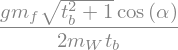

In [3]:
s = 'symbol'
ghff =(g[s]/2)*(mf/mW[s])*(cos(a)/(tb*cos(atan(tb))))

ghff 

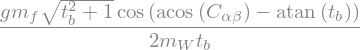

In [4]:
ghff = ghff.subs(cambioa)
ghff

### Python definition of $t$, $b$ and $\tau$ Higgs couplings

We can use sympy symbols to define our Higgs couplings and we will have beautiful latex outputs. After we can use the function lambdify of sympy to convert this symbolic coupling to numeric functions that allow numpy arrays in its arguments 

#### Symbolic definition

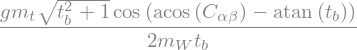

In [5]:
ghtt = ghff.subs(mf,mt[s])
ghtt

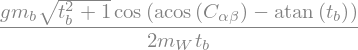

In [6]:
ghbb = ghff.subs(mf,mb[s])
ghbb

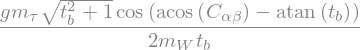

In [7]:
ghtautau = ghff.subs(mf,mtau[s])
ghtautau

#### Numeric definition

We can use the numeric_substitutions function to evaluate all constants

In [8]:
num = numeric_substitutions('All')
num

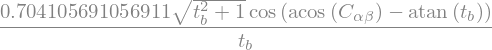

In [9]:
ghtt.subs(num)

Then use lambdify function as follow to implement numeric functions

In [10]:
ghtt_2hdmI = lambdify([cab,tb],ghtt.subs(num),'numpy')
ghtt_2hdmI(0.1,0.2)

In [11]:
ghbb_2hdmI = lambdify([cab,tb],ghbb.subs(num),'numpy')
ghbb_2hdmI(0.1,0.2)

In [12]:
ghtautau_2hdmI = lambdify([cab,tb],ghtautau.subs(num),'numpy')
ghtautau_2hdmI(0.1,0.2)

### Python definition of $W$ and $Z$ Higgs couplings

#### Symbolic definition

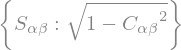

In [13]:
sab = symbols(r'{{S_{\alpha\beta}}}',real=True)
cambio_cab = {sab:sqrt(1-cab**2)}
cambio_cab

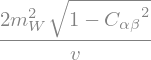

In [14]:
#ghWW1 = (gw[s]*mW[s]*sab).subs(cambio_cab)
#print(ghWW1.subs(num))
ghWW = ((2*mW[s]**2/SMvev[s])*sab).subs(cambio_cab)
ghWW

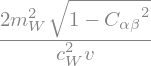

In [15]:
#ghZZ =(gz[s]*mZ[s]*sab).subs(cambio_cab)
ghZZ = ((2*mW[s]**2/(SMvev[s]*cW[s]**2))*sab).subs(cambio_cab)
ghZZ

#### Numeric definition

In [16]:
ghww_2hdmI = lambdify([cab],ghWW.subs(num),'numpy')
ghww_2hdmI(0.1)

In [17]:
ghzz_2hdmI = lambdify([cab],ghZZ.subs(num),'numpy')
ghzz_2hdmI(0.1)

## Initial parameter space

In [46]:
n = 100_000
cabnp = np.random.uniform(-1.0 ,1.0,n)
tbnp = np.random.uniform(0.02 ,50,n)
parameters = {'cab':cabnp,'tb':tbnp}

In [47]:
THDMI = HiggsCouplings()
THDMI.model = '2HDM-I'
THDMI.ghtt = ghtt_2hdmI(cabnp,tbnp)
THDMI.ghbb = ghbb_2hdmI(cabnp,tbnp)
THDMI.ghtautau = ghtautau_2hdmI(cabnp,tbnp)
THDMI.ghWW = ghww_2hdmI(cabnp)
THDMI.ghZZ = ghzz_2hdmI(cabnp)
#THDMI.gCH = 0.5
#THDMI.mCH = np.random.uniform(100,1000,n)

In [48]:
THDMI

2HDM-I couplings
            ghtt      ghbb  ghtautau       ghWW       ghZZ
0       0.377589  0.009112  0.003873  27.261464  35.086136
1       0.660500  0.015940  0.006776  42.524905  54.730540
2       0.674359  0.016274  0.006918  49.244883  63.379306
3       0.702246  0.016947  0.007204  52.462771  67.520803
4       0.602041  0.014529  0.006176  49.099444  63.192124
...          ...       ...       ...        ...        ...
999995  0.481063  0.011609  0.004935  37.060958  47.698312
999996  0.683478  0.016494  0.007011  50.606226  65.131386
999997  0.699879  0.016890  0.007180  52.340011  67.362808
999998  0.364525  0.008797  0.003739  30.061530  38.689887
999999  0.600816  0.014499  0.006163  50.847291  65.441643

[1000000 rows x 5 columns]

In [49]:
THDMIspace1 = THDMI.HiggsSignal_parameter_space(parameters,sigma=1)
THDMIspace2 = THDMI.HiggsSignal_parameter_space(parameters,sigma=2)

## Allowed parameter space

We calculate the allowed parameter space to each signal

In [50]:
THDMIspace1.keys()

dict_keys(['Rtau', 'Rb', 'Rgamma', 'Rw', 'Rz', 'Intersection', 'Fermions', 'Vectors'])

In [51]:
THDMIspace1['Rb']#['Cab']

,cab,tb
0,-0.049321,34.623312
1,-0.045108,7.351558
2,0.219553,5.022839
3,-0.028318,30.655004
4,-0.019474,19.471214
...,...,...
258073,-0.167697,25.829576
258074,-0.223292,37.541038
258075,0.168467,41.874155
258076,0.267931,36.878926


### $$R_{\tau}$$

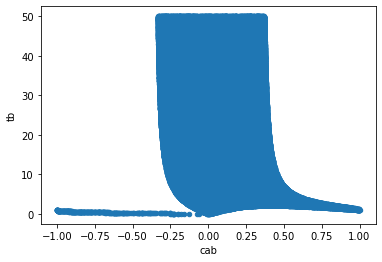

In [52]:
THDMIspace2['Rtau'].plot(x='cab',y='tb',kind='scatter')

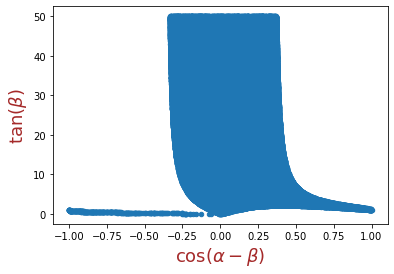

In [53]:
ax = THDMIspace2['Rtau'].plot(x='cab',y='tb',kind='scatter',)
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');
fig = ax.get_figure()
fig.savefig('rtau_space.pdf')

### $$R_{\gamma}$$

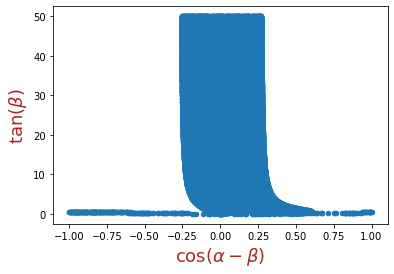

In [54]:
ax = THDMIspace2['Rgamma'].plot(x='cab',y='tb',kind='scatter',)
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

### $$R_{Z}$$

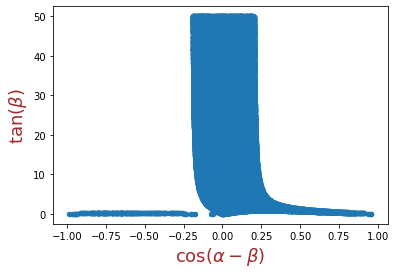

In [55]:
ax = THDMIspace2['Rz'].plot(x='cab',y='tb',kind='scatter')
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

## Intersection

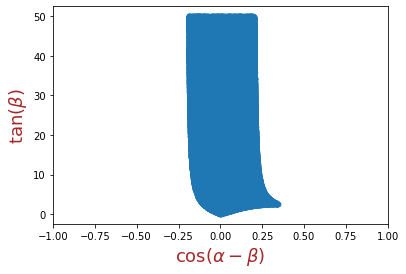

In [56]:
ax = THDMIspace2['Intersection'].plot(x='cab',y='tb',kind='scatter',)
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');
ax.set_xlim((-1,1));

## All Rxs
Using directly matplotlib

In [57]:
signals = ['Rtau','Rb','Rgamma','Rw','Rz','Intersection']
signalsV = ['Rgamma','Rw','Rz']
def multiplot(*R):
    data2s = {signal:THDMIspace2[signal] for signal in R}
    plt.figure(figsize=(10,8))
    for k in data2s.keys():
        plt.plot(data2s[k]['cab'],data2s[k]['tb'],'.',label=k,alpha=0.3)
    plt.xlabel(r'$\cos(\beta-\alpha)$');
    plt.ylabel(r'$\tan(\beta)$');
    plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\beta -\alpha)$ to 1$\sigma$')
    plt.legend();

/home/moiseszm/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


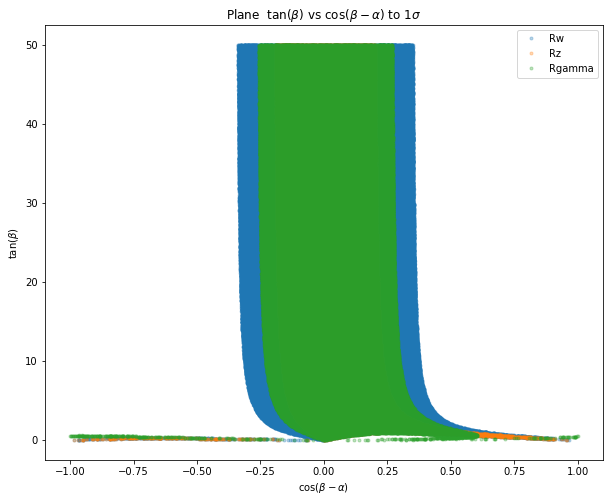

In [58]:
multiplot('Rw','Rz','Rgamma')

/home/moiseszm/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


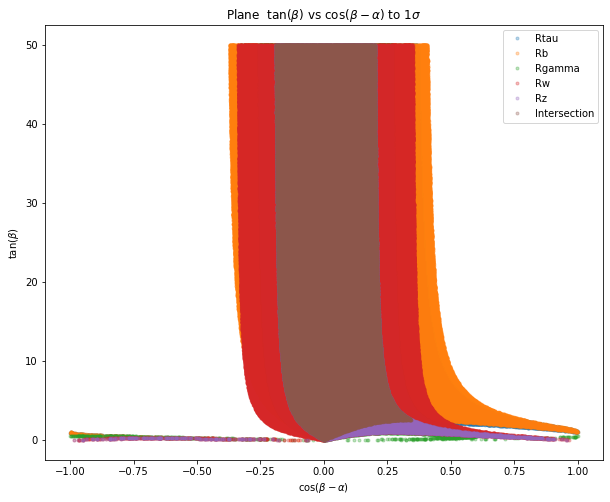

In [59]:
multiplot(*signals)

In [60]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In the next plot we reproduce the resultant plot for 2HDM-I in the plane $\cos(\beta - \alpha)$ vs $\tan(\beta)$ given in [Update of the global electroweak fit and constraints on two-Higgs-doublet models](https://arxiv.org/abs/1803.01853)

/home/moiseszm/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


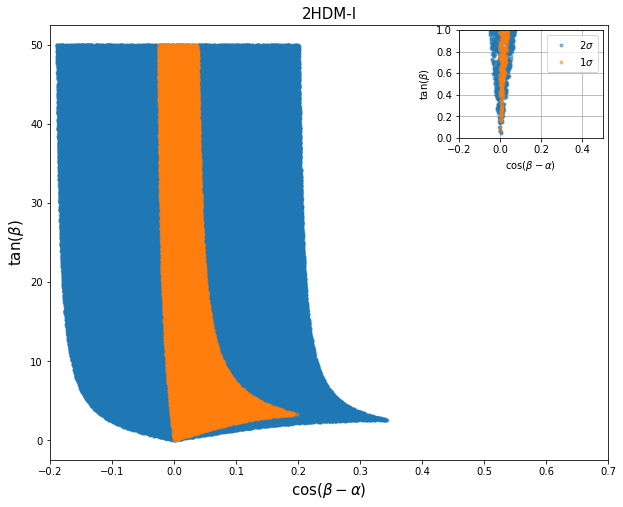

In [61]:
sigmaspace = {r'2$\sigma$':THDMIspace2,r'1$\sigma$':THDMIspace1}

fig, ax = plt.subplots(1, 1, figsize=[10, 8])
for sigma in sigmaspace.keys():
    ax.plot(sigmaspace[sigma]['Intersection']['cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
ax.set_xlim(xmax=0.7,xmin=-0.2)
#ax.grid()
ax.set_xlabel(r'$\cos(\beta -\alpha)$',fontsize=15);
ax.set_ylabel(r'$\tan(\beta)$',fontsize=15);
ax.set_title(r'2HDM-I',fontsize=15)
ax.legend();


# Create inset of width 2 inches and height 1.5 inches
# at the default upper right location
axins = inset_axes(ax, width=2, height=1.5)
for sigma in sigmaspace.keys():
    axins.plot(sigmaspace[sigma]['Intersection']['cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
axins.set_ylim(ymax=1,ymin=0)
axins.set_xlim(xmax=0.5,xmin=-0.2)
axins.grid()
axins.set_xlabel(r'$\cos(\beta -\alpha)$');
axins.set_ylabel(r'$\tan(\beta)$');
axins.legend();
#path = ''
#plt.savefig(path + 'name.pdf')
#plt.show()